# Goal of this notebook:
Find the corresponding segmentation by following the rule below:

Segmentation - 21_17426_P1_1FG_Merged_Bright_Classified \
R1 -           21_17426_P1_1FG_F \
R2 -           21_17426_P1_1FG_G \
R3 -           21_17426_P1_1FG_Merged

Based on your file structure of classification and segmentation, update it.

In [ ]:
import os

def find_corresponding_segmentation(input_file, segmentation_dir):
    # Extract the base filename without the extension
    base_filename = input_file.rsplit('_', 1)[0]
    
    # Iterate through all files in the segmentation directory
    for file in os.listdir(segmentation_dir):
        # Check if the base_filename is part of the file name
        if base_filename in file:
            return os.path.join(segmentation_dir, file)
    
    return None

# Directories
classification_dir = "split/classification/F/train/Gl6"
segmentation_dir = "data/segmentation/Gl_6"

# Iterate through all files in the classification directory
for input_file in os.listdir(classification_dir):
    # Find the corresponding segmentation file
    corresponding_segmentation = find_corresponding_segmentation(input_file, segmentation_dir)
    
    if corresponding_segmentation:
        pass
        # uncomment below to print all.
        # print(f"Input file: {input_file} -> Segmentation file: {corresponding_segmentation}")
    else:
        print(f"Input file: {input_file} -> No corresponding segmentation file found.")

Input file: 23_13776_P3_7FG_F.png -> Segmentation file: data/segmentation/Gl_6/23_13776_P3_7FG_Merged_Bright_Classified.png
Input file: 22_676_P3_4FG_F.png -> Segmentation file: data/segmentation/Gl_6/22_676_P3_4FG_Merged_Bright_Classified.png
Input file: 23_13776_P2_5FG_F.png -> Segmentation file: data/segmentation/Gl_6/23_13776_P2_5FG_Merged_Bright_Classified.png
Input file: 21_17426_P1_9FG_F.png -> Segmentation file: data/segmentation/Gl_6/21_17426_P1_9FG_Merged_Bright_Classified.png
Input file: 21_17426_P1_8FG_F.png -> Segmentation file: data/segmentation/Gl_6/21_17426_P1_8FG_Merged_Bright_Classified.png
Input file: 21_17426_P2_6FG_F.png -> Segmentation file: data/segmentation/Gl_6/21_17426_P2_6FG_Merged_Bright_Classified.png
Input file: 23_10084_P1_1FG_F.png -> Segmentation file: data/segmentation/Gl_6/23_10084_P1_1FG_Merged_Bright_Classified.png
Input file: 23_13776_P1_1FG_F.png -> Segmentation file: data/segmentation/Gl_6/23_13776_P1_1FG_Merged_Bright_Classified.png
Input file: 

Okay! File path is found. Feel free to update the logic based on your file path.

To demonstrate how it works, the first sample is collected. 

In [42]:
original_image_path = os.listdir(classification_dir)[0]
corresponding_segmentation = find_corresponding_segmentation(original_image_path, segmentation_dir)
corresponding_segmentation

'data/segmentation/Gl_6/23_13776_P3_7FG_Merged_Bright_Classified.png'

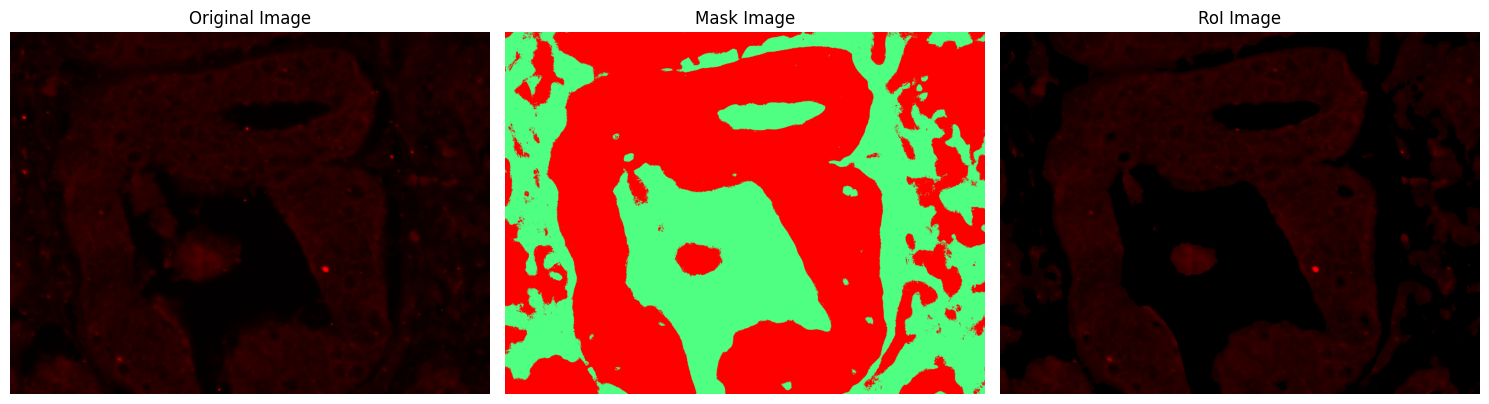

Unique color codes in the image: [0 1]
red(0) - region of interest; green(1) - not interesting


In [65]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Load the image using Pillow
mask_path = 'data/segmentation/Gl_6/23_13776_P3_7FG_Merged_Bright_Classified.png'

original_image_sample_path = os.path.join(classification_dir, original_image_path)
original_image = Image.open(original_image_sample_path).convert('RGB')
mask = Image.open(mask_path)

# Convert the mask to a NumPy array
mask_array = np.array(mask)

# Invert the mask (0 to 1 and 1 to 0)
inverted_mask = 1 - mask_array

# Apply the inverted mask to the original image
# Assuming the original image is grayscale or has the same shape as the mask
original_array = np.array(original_image)

# Ensure the original image and mask have the same spatial dimensions
if original_array.shape[:2] != mask_array.shape:
    raise ValueError("Original image and mask must have the same dimensions")

# Ensure the original image is RGB (3 channels)
if original_array.shape[2] == 4:  # If RGBA, remove alpha channel
    original_array = original_array[:, :, :3]

# Expand the inverted mask to 3 channels for broadcasting
inverted_mask = inverted_mask[..., np.newaxis]  # Shape: (height, width, 1)

# Apply the inverted mask to the original image
roi_image = original_array * inverted_mask  # Broadcasting applies mask to all channels


# Create a figure with three subplots
plt.figure(figsize=(15, 5))  # Adjust the figure size as needed

# Subplot 1: Original Image
plt.subplot(1, 3, 1)  # 1 row, 3 columns, first subplot
plt.imshow(original_image)
plt.title('Original Image')
plt.axis('off')  # Turn off axis labels

# Subplot 2: Mask Image
plt.subplot(1, 3, 2)  # 1 row, 3 columns, second subplot
plt.imshow(mask)
plt.title('Mask Image')
plt.axis('off')  # Turn off axis labels

# Subplot 3: RoI Image
plt.subplot(1, 3, 3)  # 1 row, 3 columns, third subplot
plt.imshow(roi_image)
plt.title('RoI Image')
plt.axis('off')  # Turn off axis labels

# Display the figure
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

# Get the unique pixel values (color codes) in the mask
unique_values = np.unique(mask_array)

# Print the unique color codes
print("Unique color codes in the image:", unique_values)
print("red(0) - region of interest; green(1) - not interesting")

Above subplot shows how the logic works. 

In short, only keep RoI of Original image. I rewrite the logic as a function below to iterate over all file.

In [ ]:
import os
import numpy as np
from PIL import Image

def compute_roi_image(original_image_path, mask_path):
    # Load the original image and mask
    original_image = Image.open(original_image_path).convert('RGB')
    mask = Image.open(mask_path)

    # Convert the mask to a NumPy array
    mask_array = np.array(mask)

    # Invert the mask (0 to 1 and 1 to 0)
    inverted_mask = 1 - mask_array

    # Convert the original image to a NumPy array
    original_array = np.array(original_image)

    # Ensure the original image and mask have the same spatial dimensions
    if original_array.shape[:2] != mask_array.shape:
        raise ValueError("Original image and mask must have the same dimensions")

    # Ensure the original image is RGB (3 channels)
    if original_array.shape[2] == 4:  # If RGBA, remove alpha channel
        original_array = original_array[:, :, :3]

    # Expand the inverted mask to 3 channels for broadcasting
    inverted_mask = inverted_mask[..., np.newaxis]  # Shape: (height, width, 1)

    # Apply the inverted mask to the original image
    roi_image = original_array * inverted_mask  # Broadcasting applies mask to all channels

    return roi_image

def save_roi_images(classification_dir, segmentation_dir, output_dir):
    # Ensure the output directory exists
    os.makedirs(output_dir, exist_ok=True)
    
    # Define valid image extensions
    valid_extensions = {'.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif'}

    # Iterate through all files in the classification directory
    for input_file in os.listdir(classification_dir):
        # Skip non-image files
        if not any(input_file.lower().endswith(ext) for ext in valid_extensions):
            print(f"Skipping non-image file: {input_file}")
            continue
    
        # Find the corresponding segmentation file
        corresponding_segmentation = find_corresponding_segmentation(input_file, segmentation_dir)
        
        if corresponding_segmentation:
            # Compute the ROI image
            original_image_path = os.path.join(classification_dir, input_file)
            roi_image = compute_roi_image(original_image_path, corresponding_segmentation)

            # Convert the ROI image back to a PIL Image
            roi_image_pil = Image.fromarray(roi_image.astype(np.uint8))

            # Save the ROI image to the output directory
            output_path = os.path.join(output_dir, input_file)
            roi_image_pil.save(output_path)
            print(f"Saved ROI image for {input_file} to {output_path}")
        else:
            print(f"No corresponding segmentation file found for {input_file}")

# Directories
# Update below to run it.
classification_dir = "split/classification/F/val/Gl6"
segmentation_dir = "data/segmentation/Gl_6"
output_dir = classification_dir.replace("classification", "segmentation")

# Save ROI images
save_roi_images(classification_dir, segmentation_dir, output_dir)

Saved ROI image for 23_13776_P1_2FG_F.png to split/segmentation/F/val/Gl6/23_13776_P1_2FG_F.png
Saved ROI image for 23_10084_P1_4FG_F.png to split/segmentation/F/val/Gl6/23_10084_P1_4FG_F.png
Saved ROI image for 22_16088_P3_5FG_F.png to split/segmentation/F/val/Gl6/22_16088_P3_5FG_F.png
Saved ROI image for 21_17426_P2_9FG_F.png to split/segmentation/F/val/Gl6/21_17426_P2_9FG_F.png
Saved ROI image for 23_10084_P2_9FG_F.png to split/segmentation/F/val/Gl6/23_10084_P2_9FG_F.png
Saved ROI image for 21_17426_P1_4FG_F.png to split/segmentation/F/val/Gl6/21_17426_P1_4FG_F.png
Saved ROI image for 23_1182_P3_4FG_F.png to split/segmentation/F/val/Gl6/23_1182_P3_4FG_F.png
Saved ROI image for 23_5306_P1_7FG_F.png to split/segmentation/F/val/Gl6/23_5306_P1_7FG_F.png
Saved ROI image for 21_17426_P2_10FG_F.png to split/segmentation/F/val/Gl6/21_17426_P2_10FG_F.png
Saved ROI image for 23_13776_P2_7FG_F.png to split/segmentation/F/val/Gl6/23_13776_P2_7FG_F.png
Saved ROI image for 23_5306_P3_3FG_F.png t

Don't forget to apply this for train/val/test !